# _STAT 201 Group Project Proposal_

##### _Group 31: Alexandr Kim, Yingshan Wu, Yang Lei, Harbor Zhang_

## Introduction

In our statistical investigation, we will be looking at street trees dataset provided by the City of Vancouver (See __Appendix A__). The street tree dataset lists out the information about the trees that are located within city of Vancouver with diverse classifications such as species name of the tree, common name, number of trees on street side name, and number of trees on different neighbourhood. We are going to select the `CURB` (which classifies the data into 2 category of whether or not the tree is located at the curb) and evaluating it with the `DIAMETER` (in inches). Using this data set, we are going to utilise .............. to answer an inferential question: "Are the diametres of trees at the curb different from those which are not located at the curb?".

## Preliminary Results

_Loading in the necessary libraries for this data analysis_

In [10]:
library(tidyverse)
library(cowplot)
library(infer)
library(repr)
library(ggplot2)
library(data.table)

While loading the library and shows error that the R cannot load a package, go to __Appendix B__ and install all relevant packages for this statistical investigation.

_Tidying up the `street_trees_data` for our investigation_

In [12]:
street_trees_data <- fread("https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B")

glimpse(street_trees_data)

Rows: 151,189
Columns: 19
$ TREE_ID            <int> 3469, 3475, 3478, 3479, 3482, 3489, 3507, 3510, 351…
$ CIVIC_NUMBER       <int> 3348, 3378, 3378, 3398, 3506, 3574, 3624, 3636, 364…
$ STD_STREET         <chr> "W 4TH AV", "W 4TH AV", "W 4TH AV", "W 4TH AV", "W …
$ GENUS_NAME         <chr> "CARPINUS", "THUJA", "THUJA", "CARPINUS", "LIRIODEN…
$ SPECIES_NAME       <chr> "BETULUS", "OCCIDENTALIS", "OCCIDENTALIS", "BETULUS…
$ CULTIVAR_NAME      <chr> "FASTIGIATA", "", "", "FASTIGIATA", "ARNOLD", "", "…
$ COMMON_NAME        <chr> "PYRAMIDAL EUROPEAN HORNBEAM", "NORTHERN WHITE CEDA…
$ ASSIGNED           <chr> "Y", "Y", "Y", "Y", "N", "N", "N", "N", "N", "N", "…
$ ROOT_BARRIER       <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "…
$ PLANT_AREA         <chr> "B", "B", "B", "B", "C", "C", "C", "C", "C", "C", "…
$ ON_STREET_BLOCK    <int> 3300, 3300, 3300, 3300, 3500, 3500, 3600, 3600, 360…
$ ON_STREET          <chr> "W 4TH AV", "W 4TH AV", "W 4TH AV", "W 4TH AV", "W …
$ NEIGHBOURHOO

As we can see that our original data set contains lots of irrelevant data in our statistical investigation as we only need `CURB` and `DIAMETER`. Also, it will most likely not contain `NA` values in our dataset as it is a data collected by the City of Vancouver, we are going to filter out all `NA` values using the function `!is.na()`.

In [16]:
set.seed(1234)

tidy_street_trees <- 
    street_trees_data %>%
    filter(!is.na(DIAMETER)) %>%
    select(CURB, DIAMETER)
head(tidy_street_trees)

CURB,DIAMETER
<chr>,<dbl>
Y,17.5
Y,6.0
Y,6.0
Y,15.0
Y,4.5
Y,19.5


_As our data is tidied up, we are going to first visualise our data using `geom_boxplot()` in order to see whether there are any outliers that may impact our investigation._

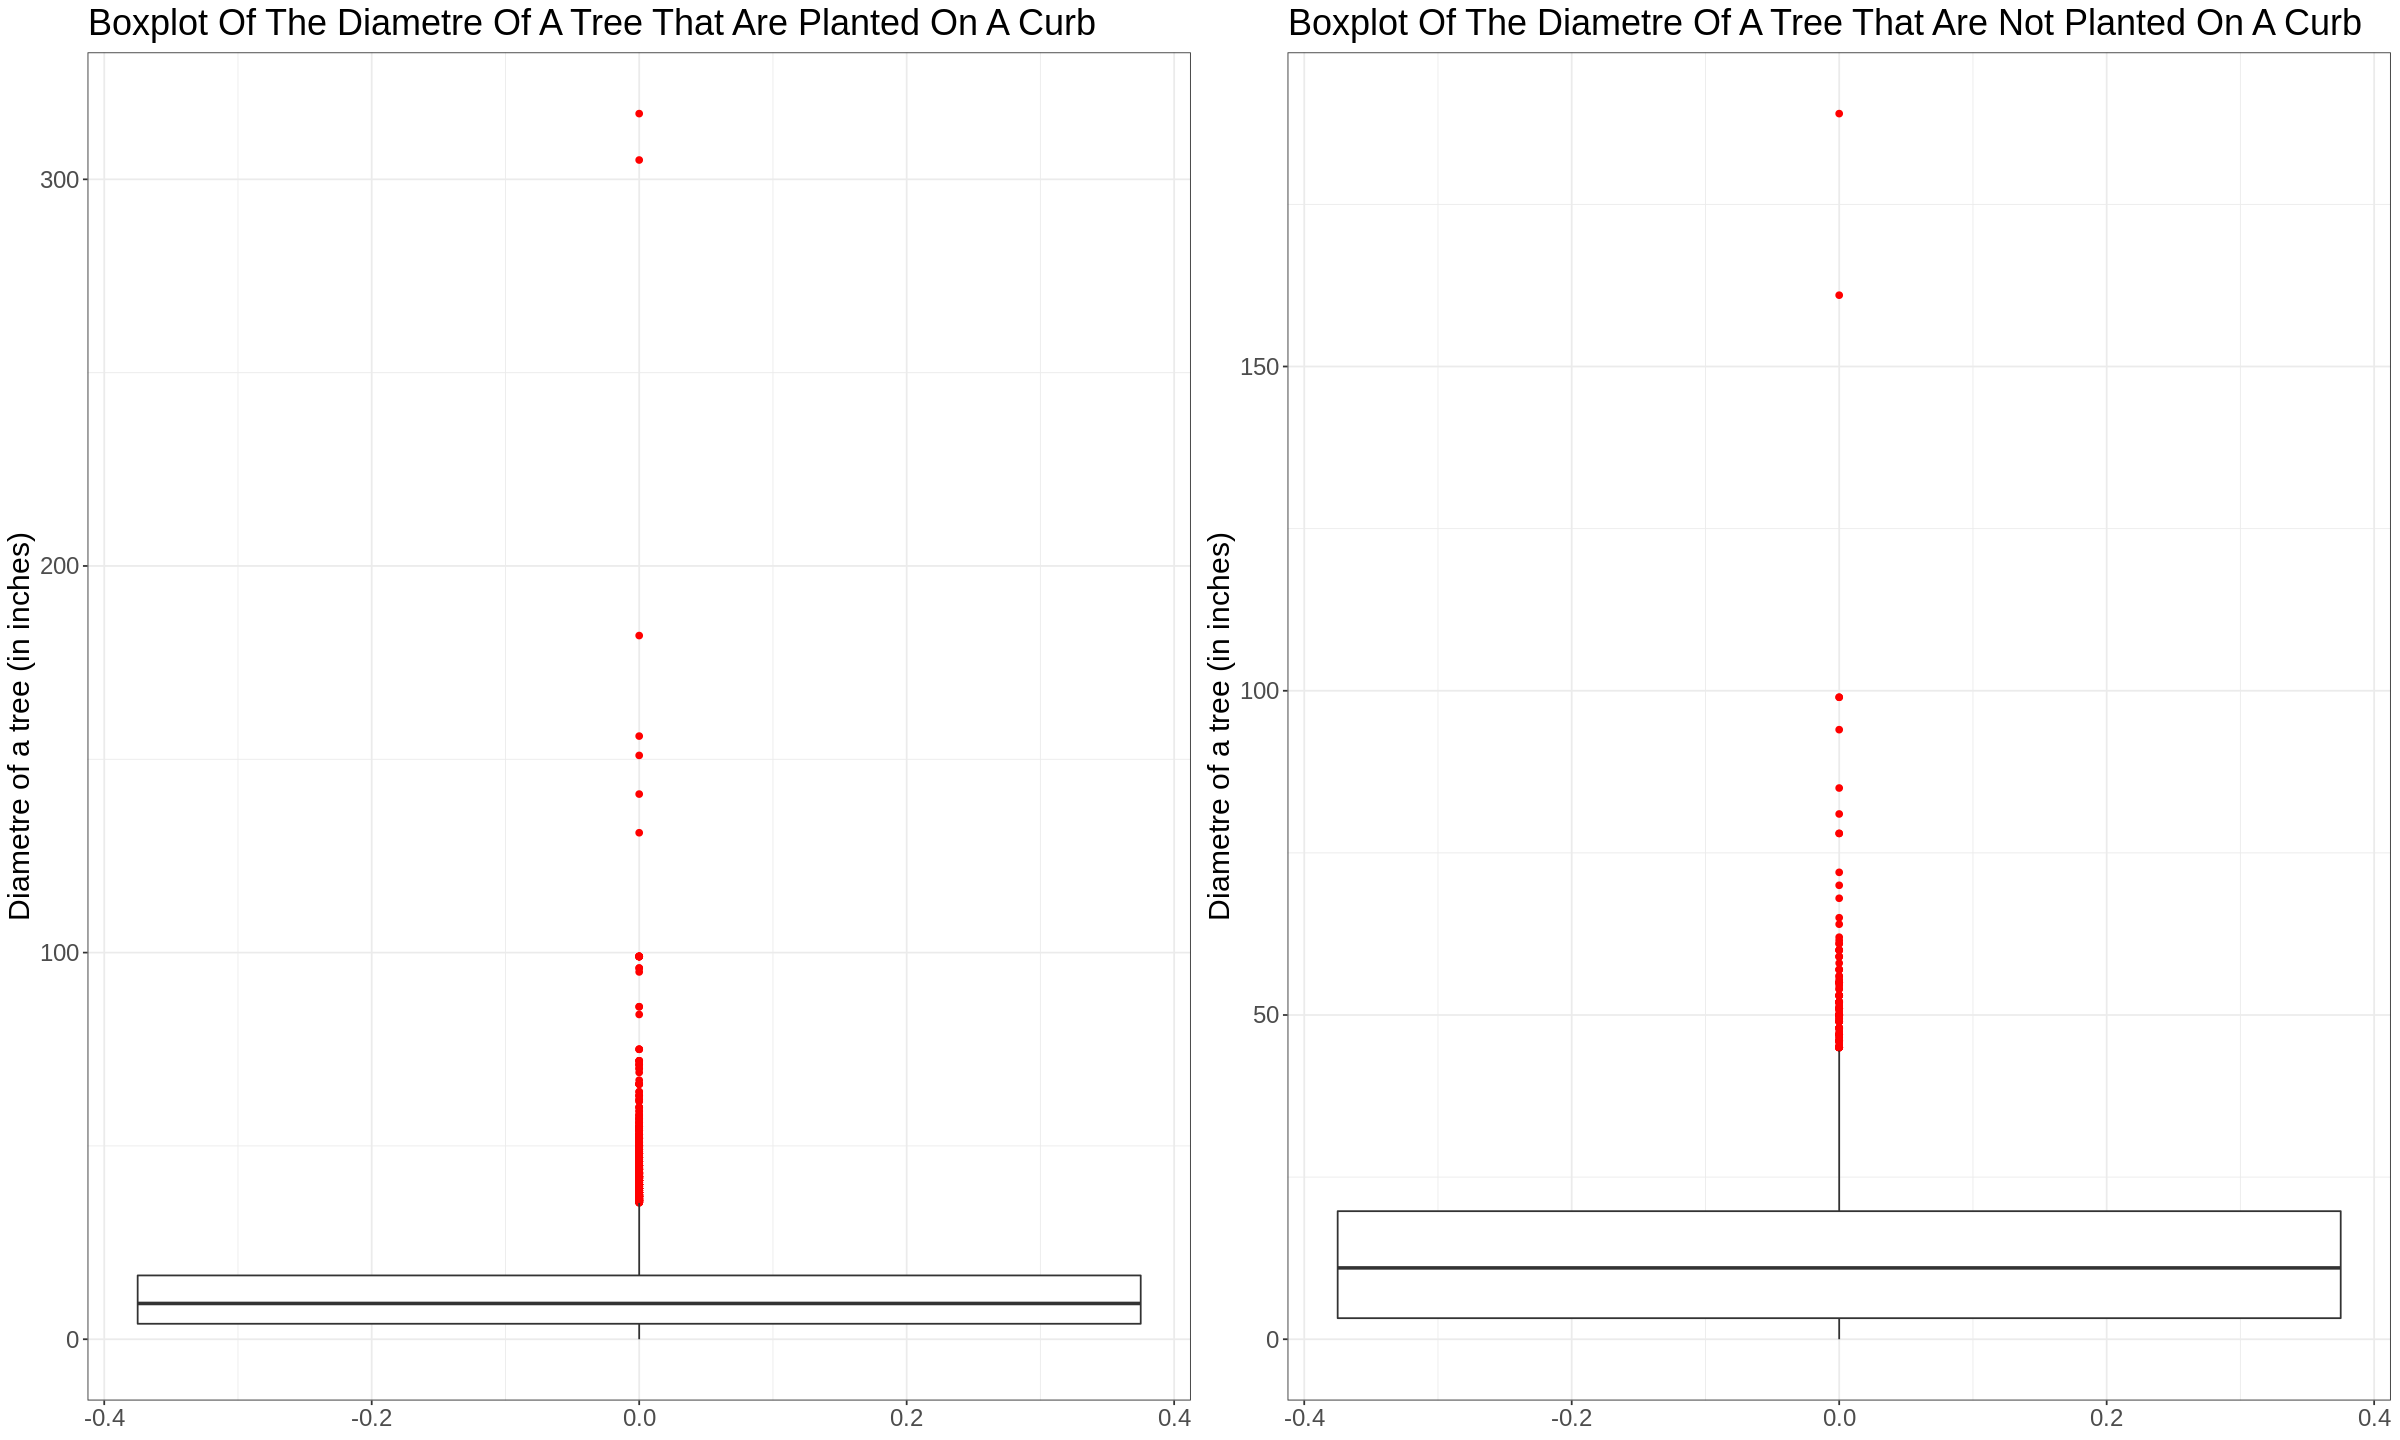

In [27]:
set.seed(1234)
options(repr.plot.width = 20, repr.plot.height = 12)

tree_curb_Y <- 
    tidy_street_trees %>%
    filter(CURB == "Y") 

tree_curb_Y_box <- 
    tree_curb_Y %>%
    ggplot() +
        geom_boxplot(outlier.color = 'red', 
                     aes(y = DIAMETER)) +
        labs(y = 'Diametre of a tree (in inches)',
             title = 'Boxplot Of The Diametre Of A Tree That Are Planted On A Curb') +
        theme_bw() +
        theme(text = element_text(size = 18)) 

tree_curb_N <- 
    tidy_street_trees %>%
    filter(CURB == "N") 

tree_curb_N_box <- 
    tree_curb_N %>%
    ggplot() +
        geom_boxplot(outlier.color = 'red', 
                     aes(y = DIAMETER)) +
        labs(y = 'Diametre of a tree (in inches)',
             title = 'Boxplot Of The Diametre Of A Tree That Are Not Planted On A Curb') +
        theme_bw() +
        theme(text = element_text(size = 18)) 

tree_curb_box <- plot_grid(tree_curb_Y_box, tree_curb_N_box)
tree_curb_box

## Methods: Plan

### Appendix A: Data set for street trees in Vancouver (BC, Canada) recorded by City of Vancouver

In [4]:
install.packages("data.table")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [6]:
street_trees_data <- fread("https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B")

head(street_trees_data)

TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ASSIGNED,ROOT_BARRIER,PLANT_AREA,ON_STREET_BLOCK,ON_STREET,NEIGHBOURHOOD_NAME,STREET_SIDE_NAME,HEIGHT_RANGE_ID,DIAMETER,CURB,DATE_PLANTED,Geom
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<date>,<chr>
3469,3348,W 4TH AV,CARPINUS,BETULUS,FASTIGIATA,PYRAMIDAL EUROPEAN HORNBEAM,Y,N,B,3300,W 4TH AV,KITSILANO,EVEN,4,17.5,Y,NA,"{""""coordinates"""": [-123.17866, 49.26841], """"type"""": """"Point""""}"
3475,3378,W 4TH AV,THUJA,OCCIDENTALIS,,NORTHERN WHITE CEDAR,Y,N,B,3300,W 4TH AV,KITSILANO,EVEN,2,6.0,Y,NA,
3478,3378,W 4TH AV,THUJA,OCCIDENTALIS,,NORTHERN WHITE CEDAR,Y,N,B,3300,W 4TH AV,KITSILANO,EVEN,2,6.0,Y,NA,
3479,3398,W 4TH AV,CARPINUS,BETULUS,FASTIGIATA,PYRAMIDAL EUROPEAN HORNBEAM,Y,N,B,3300,W 4TH AV,KITSILANO,EVEN,4,15.0,Y,NA,"{""""coordinates"""": [-123.17871, 49.2684], """"type"""": """"Point""""}"
3482,3506,W 4TH AV,LIRIODENDRON,TULIPIFERA,ARNOLD,ARNOLD TULIPTREE,N,N,C,3500,W 4TH AV,KITSILANO,EVEN,2,4.5,Y,1998-02-18,"{""""coordinates"""": [-123.18195, 49.26848], """"type"""": """"Point""""}"
3489,3574,W 4TH AV,TILIA,EUCHLORA X,,CRIMEAN LINDEN,N,N,C,3500,W 4TH AV,KITSILANO,EVEN,4,19.5,Y,NA,"{""""coordinates"""": [-123.18309, 49.2685], """"type"""": """"Point""""}"


### Appendix B: Adding Necessary Packages

In order to load the packages, we have to use the code `install.packages()`. Before running the code cell below, check whether the packages are already installed in R as it takes a while to run this cell.

In [7]:
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("repr")
install.packages("cowplot")
install.packages("ggplot2")
install.packages("GGally")
install.packages("digest")
install.packages("infer")
install.packages("RCurl")
install.packages("data.table")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("cowplot"):
“installation of package ‘cowplot’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making '

After installing relevant packages, we need to load it into workflow using `library()`